<a href="https://colab.research.google.com/github/Bunyodbekkk/Advertising_Machine/blob/main/Advertising.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df=pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/reklama_sales.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# New Section

In [4]:
df.corrwith(df['Sales'])

TV           0.901208
Radio        0.349631
Newspaper    0.157960
Sales        1.000000
dtype: float64

In [5]:
from sklearn.model_selection import train_test_split
train_set,test_set = train_test_split(df,test_size=0.1,random_state=42)

In [6]:
from sklearn import linear_model
LR_model=linear_model.LinearRegression()
x_train=np.asanyarray(train_set[['TV']])
y_train=np.asanyarray(train_set[['Sales']])

In [7]:
LR_model.fit(x_train,y_train)

LinearRegression()

In [8]:
theta1=LR_model.coef_[0][0]
theta0=LR_model.intercept_[0]
print(theta1)
print(theta0)

0.05513263076693964
7.044916461655207


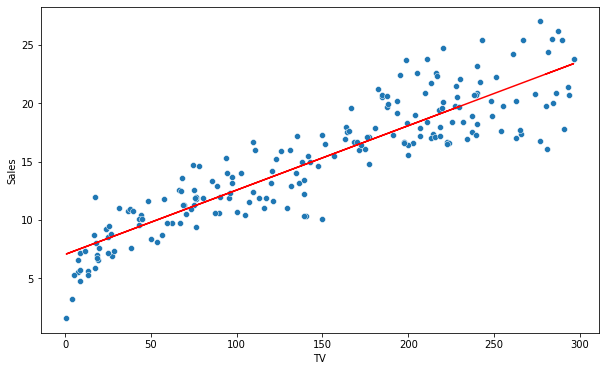

In [9]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x='TV',y='Sales')
plt.plot(x_train,theta1*x_train + theta0,'-r')

In [10]:
x_test=np.asanyarray(test_set[['TV']])
y_test=np.asanyarray(test_set[['Sales']])

In [11]:
y_predict=LR_model.predict(x_test)

In [12]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
Mae=mean_absolute_error(y_test,y_predict)
Mse=np.sqrt(mean_squared_error(y_test,y_predict))
print(f"Mae= {Mae} ")
print(f"Mse= {Mse} ")

Mae= 2.037955356968121 
Mse= 2.5103822386472214 


In [13]:
import joblib
filename='TV_Sales.jbl'
joblib.dump(LR_model,filename)

['TV_Sales.jbl']